In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
def build_cnn_model():
    model = models.Sequential()

    # First Convolutional Layer with stride 1, padding 'same'
    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))

    # Max Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Layer with stride 2 (strided convolution)
    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Transposed Convolution Layer (for up-sampling, also known as deconvolution)
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Dilated Convolution Layer with dilation rate of 2
    model.add(layers.Conv2D(64, (3, 3), dilation_rate=2, padding='same', activation='relu'))

    # Max Pooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output before feeding it to fully connected layers
    model.add(layers.Flatten())

    # Fully connected layer
    model.add(layers.Dense(128, activation='relu'))

    # Output layer for 10 classes
    model.add(layers.Dense(10))

    return model

# Create the CNN model
cnn_model = build_cnn_model()

# Model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 618,954 (2.36 MB)

 Trainable params: 618,954 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer=Adam(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [ ]:
history = cnn_model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3577 - loss: 1.7402 - val_accuracy: 0.5618 - val_loss: 1.2039
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6148 - loss: 1.0911 - val_accuracy: 0.6444 - val_loss: 1.0020
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6910 - loss: 0.8765 - val_accuracy: 0.6863 - val_loss: 0.9001
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7428 - loss: 0.7375 - val_accuracy: 0.6905 - val_loss: 0.9194
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7741 - loss: 0.6444 - val_accuracy: 0.7017 - val_loss: 0.8759
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8104 - loss: 0.5393 - val_accuracy: 0.7112 - val_loss: 0.8935
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8403 - loss: 0.4515 - val_accuracy: 0.7096 - val_loss: 0.9452
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8717 - loss: 0.3

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc}")


313/313 - 1s - 2ms/step - accuracy: 0.7114 - loss: 1.1487
Test Accuracy: 0.7113999724388123


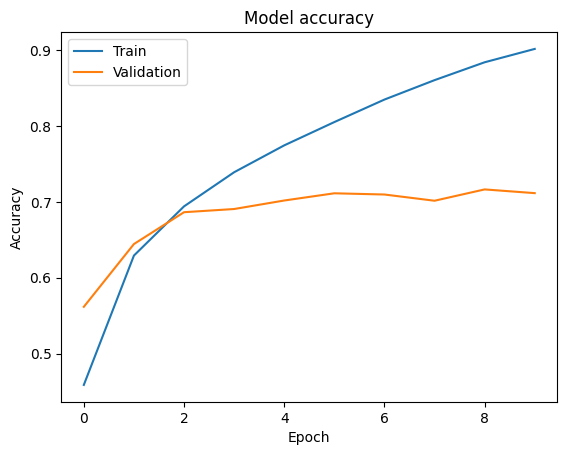

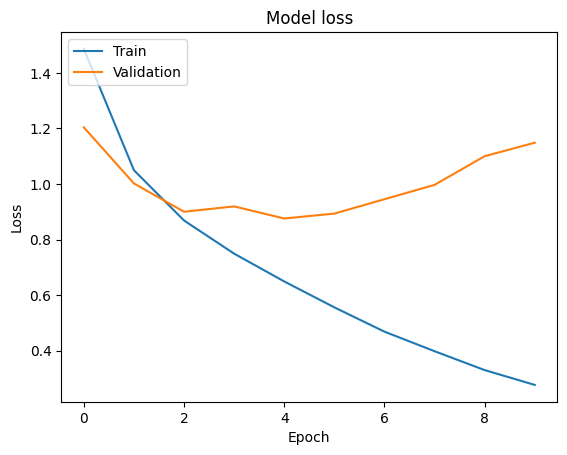

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
